In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fontTools.otlLib.optimize.gpos import Cluster
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN

In [2]:
# Data preprocessing
# Converting the text file to CSV for easy accessing the rows and columns

input_txt_file = "/home/chaitu/Desktop/VR_predict/labels/cam_1_000619_000331836957_reprojected_1.txt"
output_csv_file = input_txt_file[:-4] + ".csv"

# Read the YOLOV8 output txt file
# Column names: class, x_center, y_center, width, height

columns = ['Class', 'X_center', 'Y_center', 'Width', 'Height']

df = pd.read_csv(input_txt_file, sep = " ", header= None, names = columns)

#Save the DataFrame (df) as a CSV file
df.to_csv(output_csv_file, index = False)


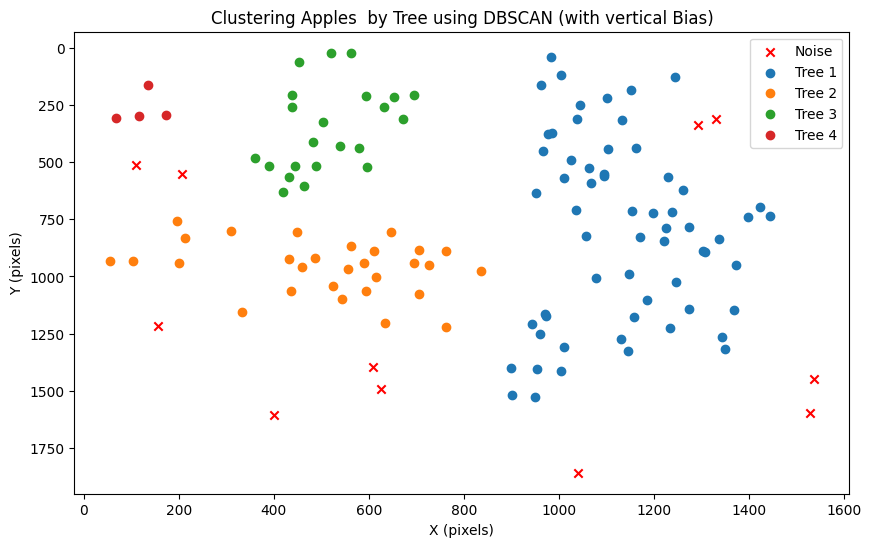

Cluters found: [-1  0  1  2  3]


In [47]:
#clustering 

csv_path = "/home/chaitu/Desktop/VR_predict/labels/cam_1_000619_000331836957_reprojected_1.csv"
bounding_boxes_df = pd.read_csv(csv_path)

bbox_centers_normalized = bounding_boxes_df[['X_center', 'Y_center']].values

# Convert bounding boxes to image pixel coordinates
image_width = 2048
image_height = 2048
bbox_centers = np.array([(bbox[0] * image_width, bbox[1] * image_height) for bbox in bbox_centers_normalized])

# Additional snippet for Vertical scaling 
# Apply vertical bias by scaling the Y-coordinate
# vertical_scale_factor = 2
# bbox_centers_scaled = np.copy(bbox_centers)
# bbox_centers_scaled[:, 1] = bbox_centers_scaled[:, 1] * vertical_scale_factor

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=160, min_samples=3)
clusters = dbscan.fit_predict(bbox_centers)

# Visualize the clustering
plt.figure(figsize=(10,6))
for cluster_id in np.unique(clusters):
    cluster_points = bbox_centers[clusters == cluster_id]
    if cluster_id == -1:
        # Noise points
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label = 'Noise', color='red', marker='x')
        
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label =f'Tree {cluster_id +1}')

plt.title('Clustering Apples  by Tree using DBSCAN (with vertical Bias)')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.legend()
plt.gca().invert_yaxis() # Invert Y axis for image coordinate system
plt.show()

# Print Cluster results
print(f"Cluters found: {np.unique(clusters)}")
        